# Kiet Nguyen - DAT 402 - PROJECT 2

## PROJECT OVERVIEW
This report using the Bank marketing data from Kaggle, included in the following link: https://archive.ics.uci.edu/dataset/222/bank+marketing. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution, and the result is indicated via the output variables "y."

Our project aims at comparing the accuracy of different machine learning models in predicting the "y" variable. The methods we are using include: K Nearest Neighbors, Random Forest. For processing data, we are also attempting Principle Component Analysis and Feature Selection to reduce the dimension of the dataset.

In [1]:
# Importing all necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, auc, roc_curve

import warnings # ignore warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


## Dataset Overview


In [2]:
# Loading the dataset
df = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv", sep = ";")     

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
df.describe

<bound method NDFrame.describe of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

Our dataset has 41188 rows with 21 columns. The features can be classifed into 4 groups (given by the dataset provider)

### Bank client data:
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### Related with the last contact of the current campaign:
- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric).
### Other attributes:
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Data Wrangling

We first started by checking if there are any null data in our dataset. In our dataset, null values are indicated as "unknown." We need to label "unknown" as "np.na"

In [3]:
for column in df.columns:
    df[column].replace("unknown", np.nan, inplace = True)

In [4]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

We then try to see the distributions of each variables to find out if any distribution is extremely disproportional. Social and economic context attributes will not be investigated as they are independent from our campaigns, i.e not influenced by the result of our campaign. Note that other variables are discrete.

[]

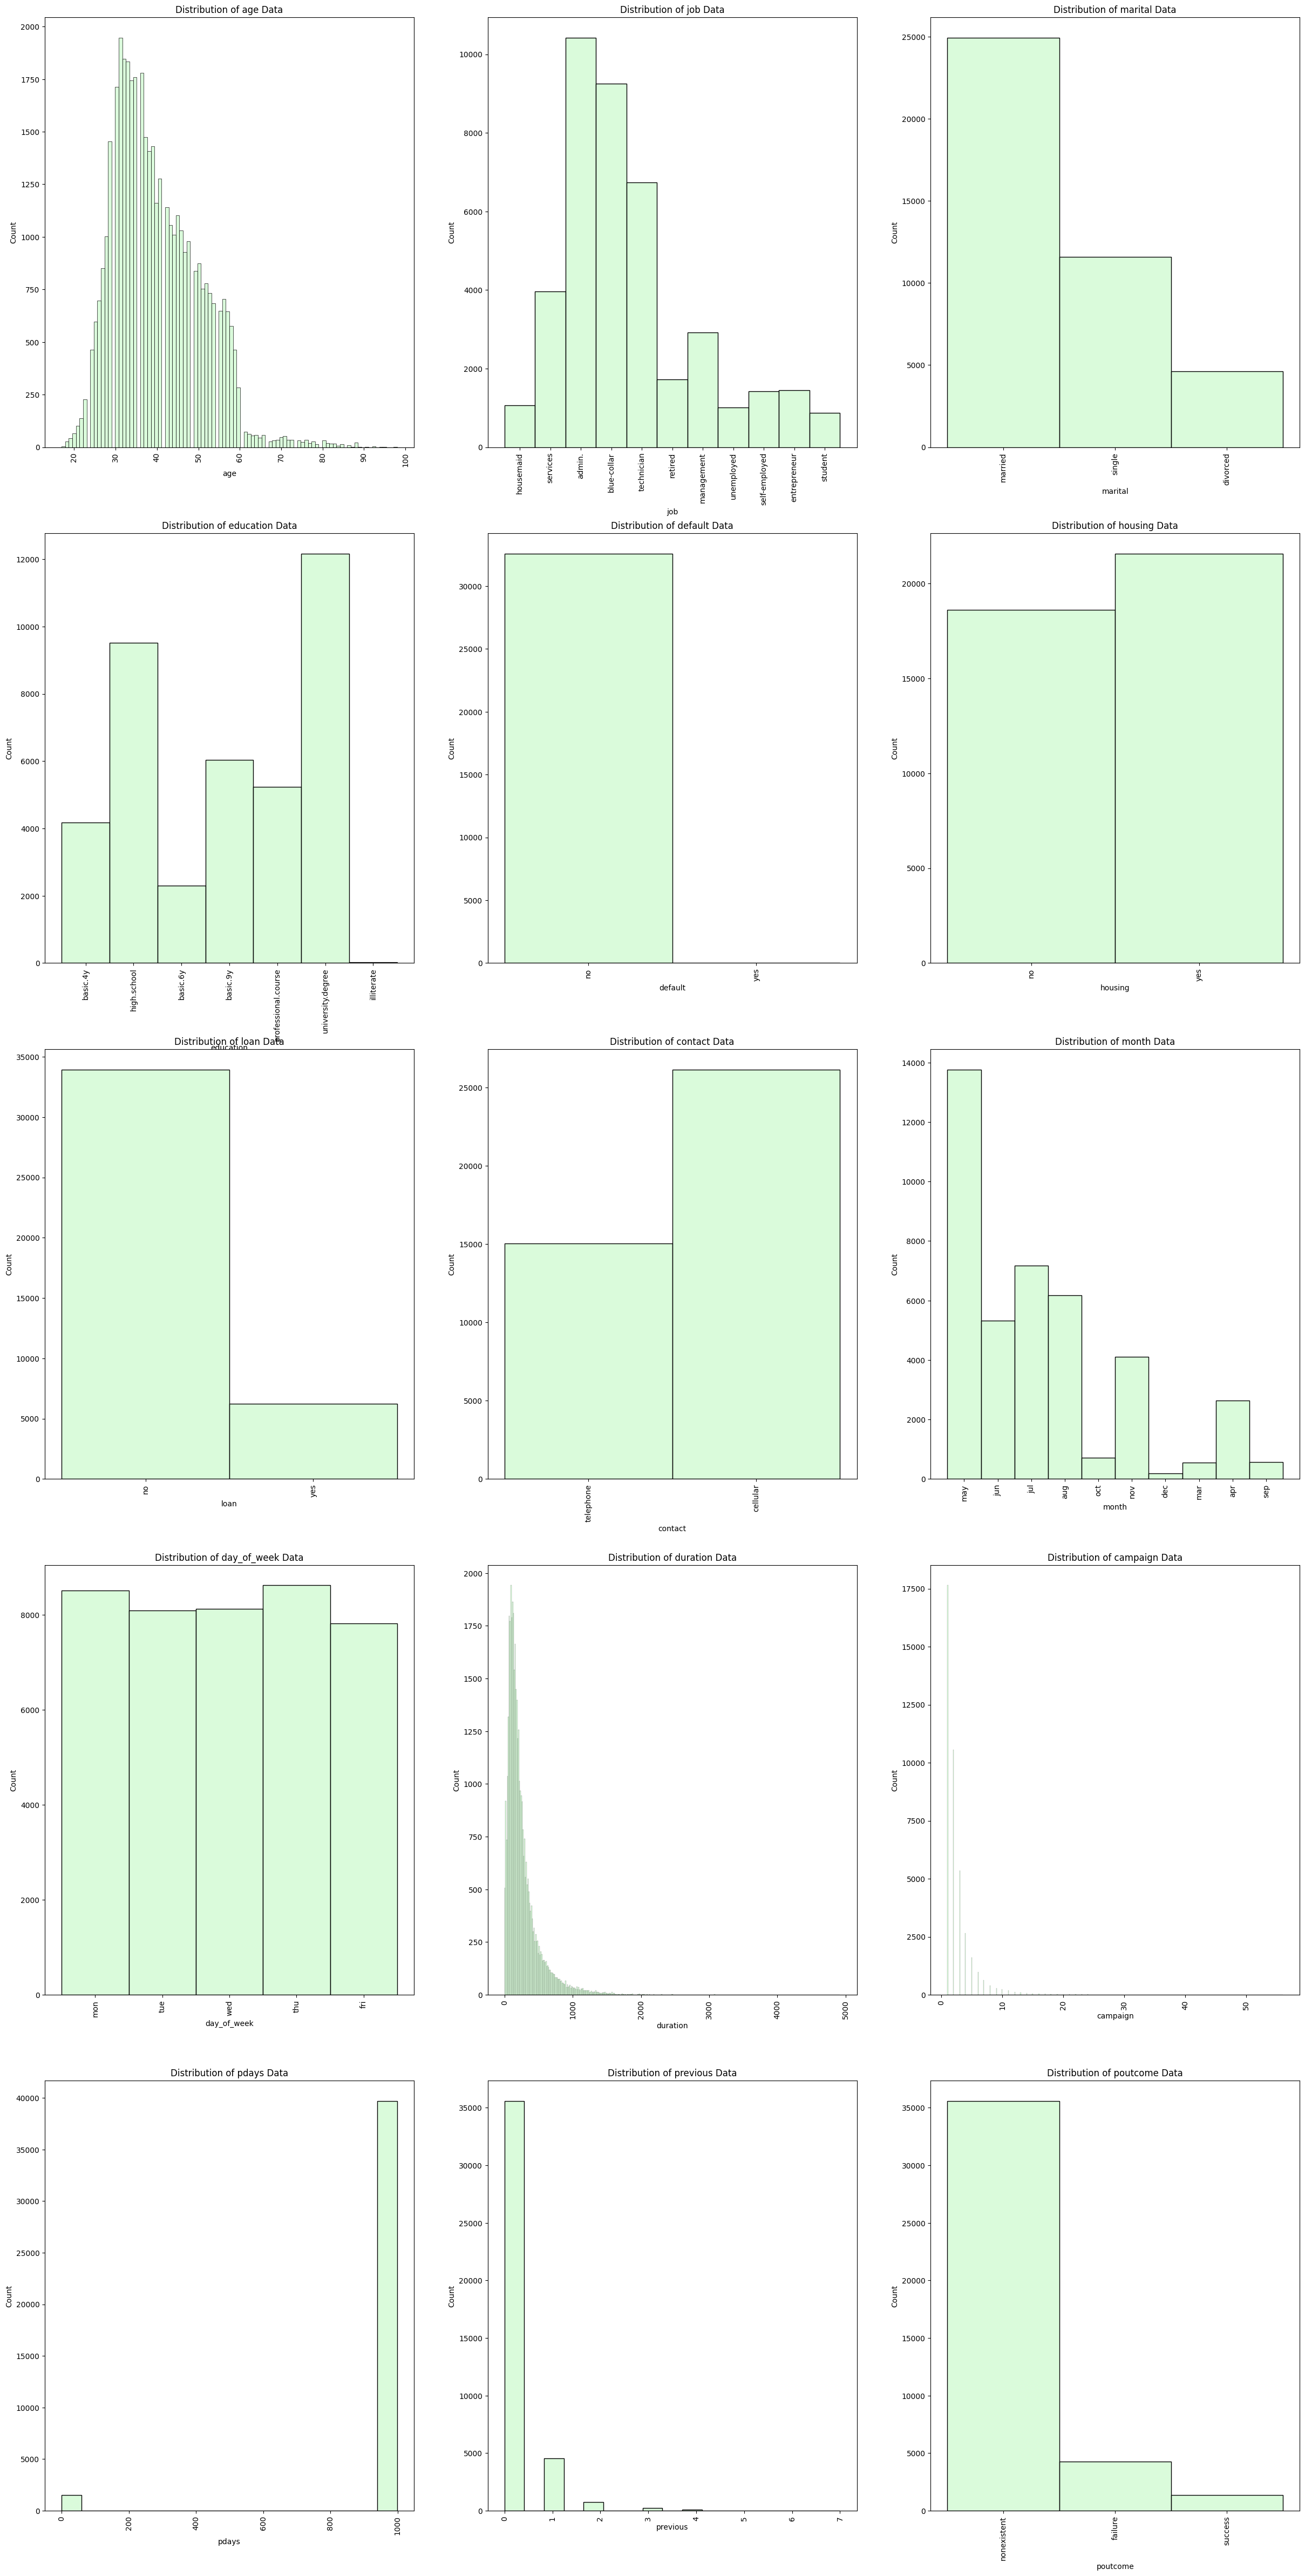

In [5]:
plt.figure(figsize=(30, 60))

for i, col in enumerate(df.columns[:15], 1):
    plt.subplot(5, 3, i)
    sns.histplot(x = df[col], color='#cefad0')
    plt.title(f"Distribution of {col} Data")
    plt.xticks(rotation=90)
    
plt.plot()

From the above distributions, it is clear that 2 attributes are highly skewed:
- default: In 41k of observation, more than 35k observations do not have credit in default.
- pdays: In 41k of observation, almost 40k observations were not contacted previously.

Also, there are some other interesting points we can consider:
- age: it has quite huge age range, from around 15 to 95. However, most of records fall into the 25-55 range
- day_of_week: The distribution of this is quite of a uniform distribution

In [6]:
df.drop('default',inplace=True, axis = 1)
df.drop("pdays", inplace=True, axis=1)
df.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'], dtype=object)

### Transforming data

For **education** field, *basic.4y*, *basic.6y*, *basic.9y* can be grouped into *middle school*.

In [7]:
ed = ['basic.9y','basic.6y','basic.4y']
df.loc[df['education'].isin(ed), 'education'] = "middle_school"

df['education'].value_counts()

education
middle_school          12513
university.degree      12168
high.school             9515
professional.course     5243
illiterate                18
Name: count, dtype: int64

Finally, we can proceed to drop na values

In [8]:
df.dropna(inplace = True)
df.isna().sum() # double check

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
le = LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week", "poutcome", "y"]
for i in objects:  
    df[i] = le.fit_transform(df[i])
    
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2,0,0,1,6,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,0,0,0,1,6,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,0,1,0,1,6,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,1,6,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,0,0,1,1,6,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


We now proceed to investigate the correlation between each column:

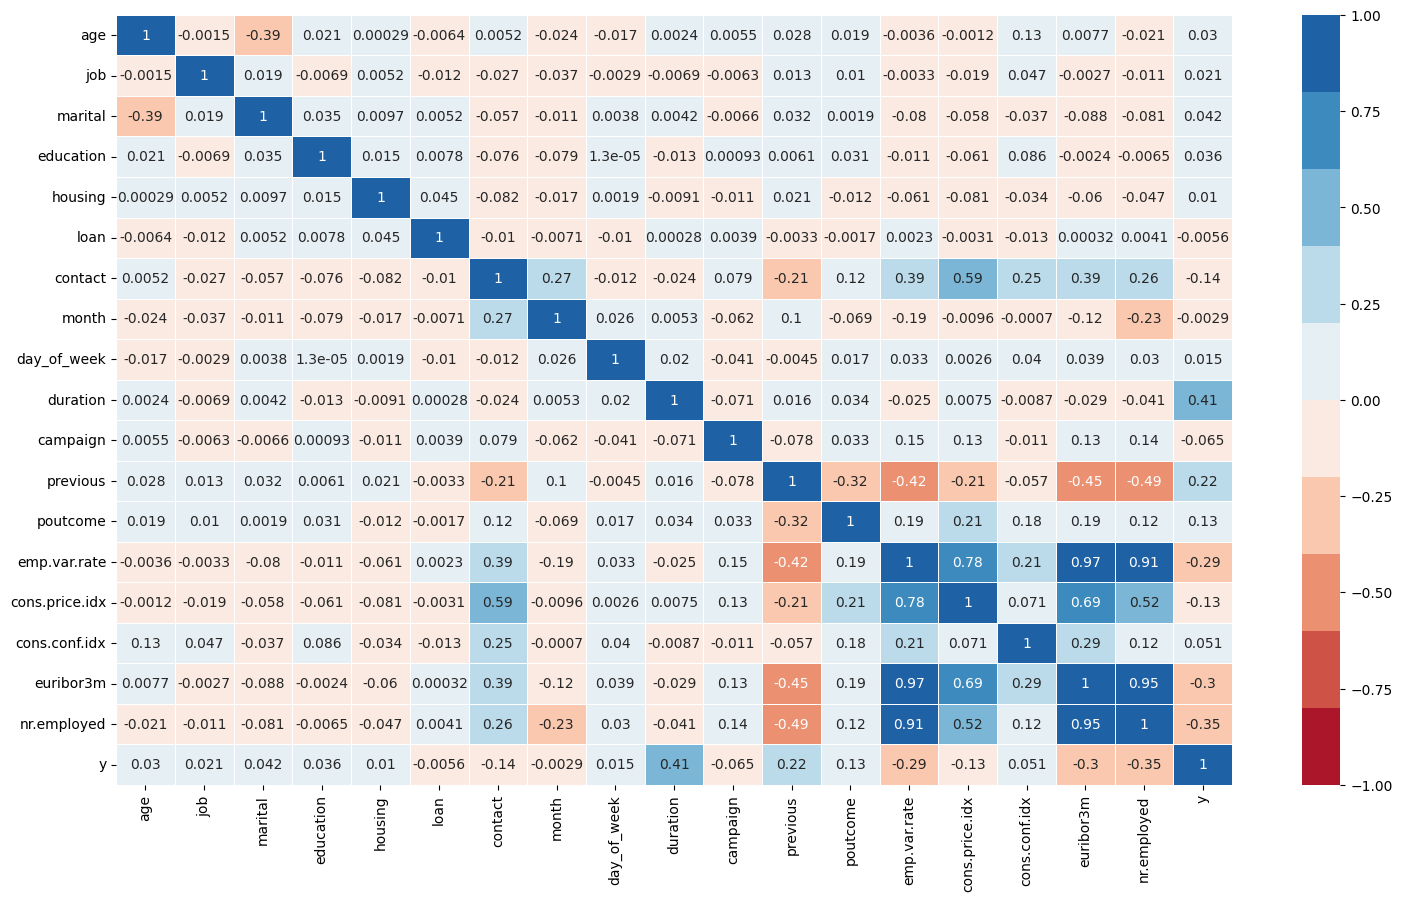

In [12]:
plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.color_palette("RdBu", 10), annot=True, linewidths=.5)
plt.show()

## Analysis Step

In [13]:
# We started seperating X and y
X = df.loc[:, df.columns != "y"]
y = df["y"]

# Check X
X.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,2,0,0,1,6,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,0,0,0,1,6,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,0,1,0,1,6,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,2,0,0,1,6,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,0,0,1,1,6,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0


In [14]:
# Check y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [15]:
# 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

### K-Nearest Neighbor

In [16]:
# Import k-Nearest Neighbor classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

def KNN_train(X_train, X_test, y_train, y_test, n):
    """
    :param X_train: training data .
    :param X_test: testing data
    :param y_train: training outcome.
    :param y_test: testing outcome.
    :param n: number of nearest neighbor (hyperparameter)
    :return: a trained K-Nearest Neighbor model.
    """
    
    accuracy = []
    bestModel, max_acc, num_of_neighbors = None, 0, 0
    
    for i in range(1, n+1):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        prediction = knn.predict(X_test)
        curr_acc = accuracy_score(prediction, y_test)
        accuracy.append(curr_acc) # Calcualte the accuracy of the current model
        
        # Find best model with minimum k
        if curr_acc > max_acc:
            bestModel, max_acc, num_of_neighbors = knn, curr_acc, i
    
    fpr, tpr, threshold = roc_curve(y_test,
                bestModel.predict_proba(X_test)[:,1]) # Calculate false postive rate and true positive rate
    roc_auc = auc(fpr, tpr)
    
    # Plot the accuracy plot and AUC_ROC curve

    plt.figure(figsize=(6,6))
    plt.plot(range(1,n+1), accuracy ,color = 'black',linestyle = 'dashed', marker='o',markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. K Value, K = ' + str(num_of_neighbors))
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
    plt.xlabel('1-Specifictivity')
    plt.ylabel('Sensitivity')
    plt.title('ROC Curve of Random Forest Classifier')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    print("Maximum accuracy: ", max(accuracy),"at K =", num_of_neighbors)
    
    return bestModel    

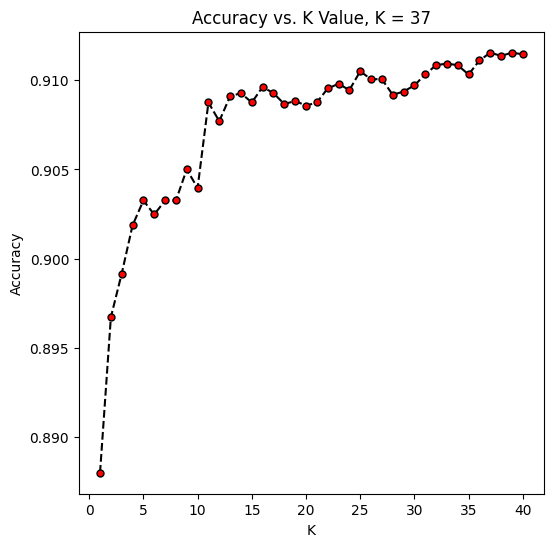

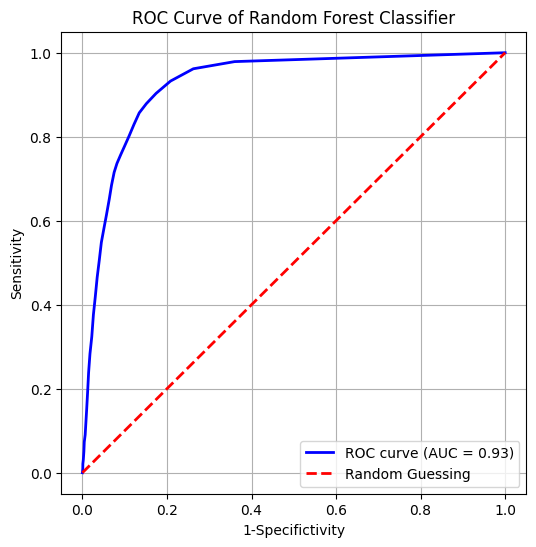

Maximum accuracy:  0.9115391319504967 at K = 37


In [17]:
# Train KNN  with maximum of 40 neighbors
knn_model = KNN_train(X_train, X_test, y_train, y_test, 40)

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

def RF_train(X_train, X_test, y_train, y_test, n = 100):
    """
    :param X_train: training data .
    :param X_test: testing data
    :param y_train: training outcome.
    :param y_test: testing outcome.
    :param n: number of tree of Random Forest model
    :return: a trained Random Forest model.
    """
    
    # Train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_probs = rf_classifier.predict_proba(X_test)[:,1] # Return probability of each class, instead of 0-1 classification

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)

    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
    plt.xlabel('1-Specifictivity')
    plt.ylabel('Sensitivity')
    plt.title('ROC Curve of Random Forest Classifier')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    prediction = (y_probs > 0.5).astype(int) # Converting probability back to 0 - 1 scale
    
    print("Accuracy: ", accuracy_score(prediction, y_test))
    return rf_classifier

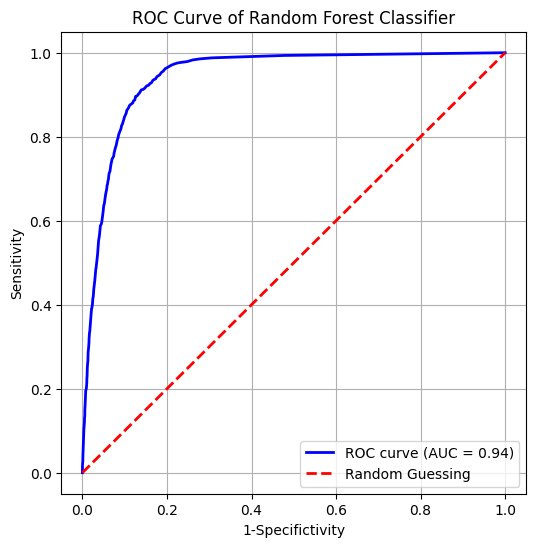

Accuracy:  0.9165068851316018


In [21]:
rf_classifier = RF_train(X_train, X_test, y_train, y_test, 200)

## Feature Selection

We are trying to decrease the dimension of dataset by 

[]

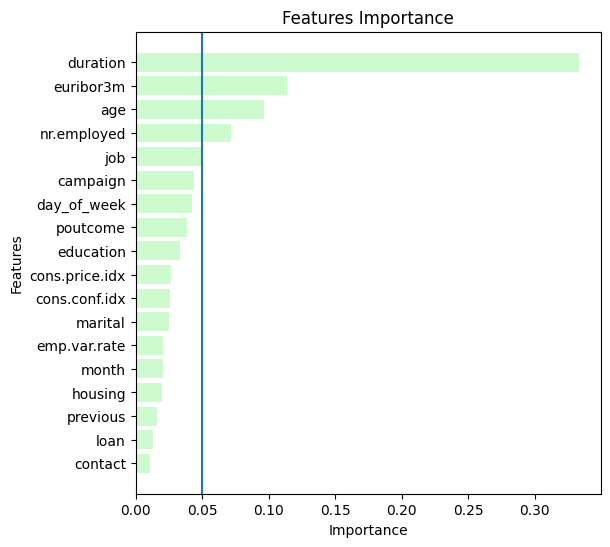

In [22]:
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize = (6,6))
plt.barh(feat_importances.index, feat_importances, color = "#cefad0")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Features Importance")
plt.axvline(0.05,0)
plt.plot()

**Duration** contributes the most to the prediction of **y**. Some other features such as  **loan**, **contact**, **previous**, **emp.var.rate**, **housing**, **month** do not have much help in our prediction. We will attempt to keep features which contributes more than 5% to the prediction of **y**, which are **job**, **nr.employed**, **age**, **euribor3m** and **duration**.

In [23]:
#X1 = X.copy()
keeping_columns = ["duration","euribor3m", "age", "nr.employed", "job"]
X1 = X[keeping_columns]
y1 = y.copy()
#drop_list = ["contact", "loan", "previous", "emp.var.rate","housing", "month", "marital"]

#for col in drop_list:
#    X1.drop(col, axis=1, inplace=True)

X1.head()

,duration,euribor3m,age,nr.employed,job
0,261,4.857,56,5191.0,3
1,149,4.857,57,5191.0,7
2,226,4.857,37,5191.0,7
3,151,4.857,40,5191.0,0
4,307,4.857,56,5191.0,7


In [24]:
# 70-30 train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=123456)

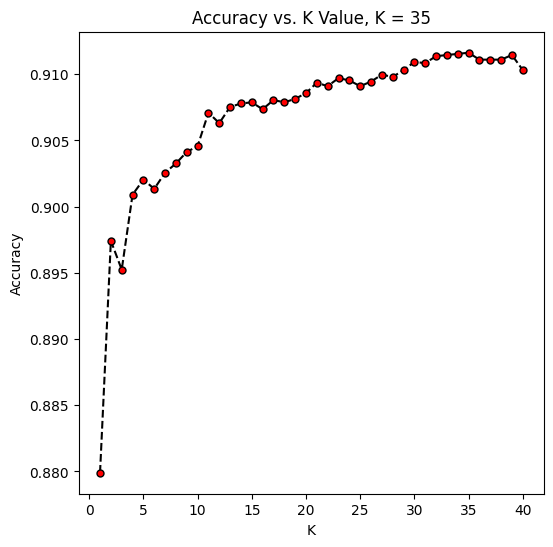

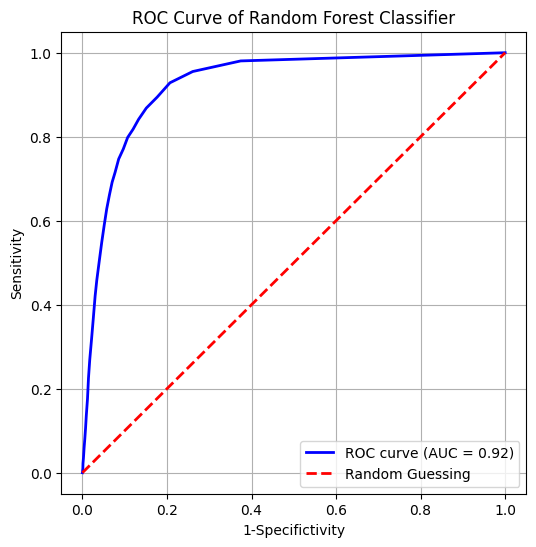

Maximum accuracy:  0.9116262855150775 at K = 35


In [25]:
# Train with KNN
knn_model_fc = KNN_train(X1_train, X1_test, y1_train, y1_test, 40)

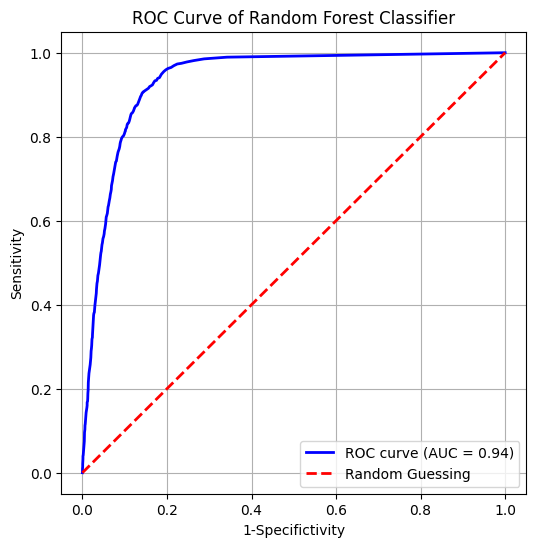

Accuracy:  0.9098832142234617


In [26]:
# TRAIN Random Forest model
rf_classifier_fc = RF_train(X1_train, X1_test, y1_train, y1_test, 200)

## Principle Components Analysis

Unlike Feature Selection above where we directly exclude unimportant features, PCA finds the principle components by finding the linear combinations of all features. We are trying to find the set of principle components whose dimension is lower than the original set of features, but still retain most of the variance of our data.

PCA is sensitive to the scale of the features, so it's important to standardize the data to have a mean of 0 and a standard deviation of 1. Then, we apply the **pca** algorithm to find the principle components.

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def standardized_pca(X, n_components=10):
    """
    Select features using Principal Component Analysis (PCA).

    :param df: dataset.
    :target: target column.
    :param n_components: The number of principal components to retain.
    :return: A DataFrame containing selected features and the target column.
    """
    # Standardize X
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize PCA with the specified number of components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
        
    # Scree Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, 'o-', markersize=8)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Scree Plot')
    plt.xticks(range(1, n_components+1))
    plt.show()
    
    # Cumulative Proportion of Variance Explained
    cummulative_variance_explained_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize= (10,6))
    plt.plot(range(1, n_components+1), cummulative_variance_explained_ratio, 'o-', markersize = 8)
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
    plt.axhline(y=0.99, color='g', linestyle='--', label='99% Explained Variance')
    plt.legend(loc='best')
    plt.title('Cumulative Explained Variance by Components')
    plt.show()
    

    return X_pca

**Scree Plot** shows how much variacne of the dataset can each principle componet of our principle components set explain.

**Cumulative Explained Variance by Components** shows how much variance in total our set of principle components can exaplain. The more the variance is, the better the new components represents our dataset.

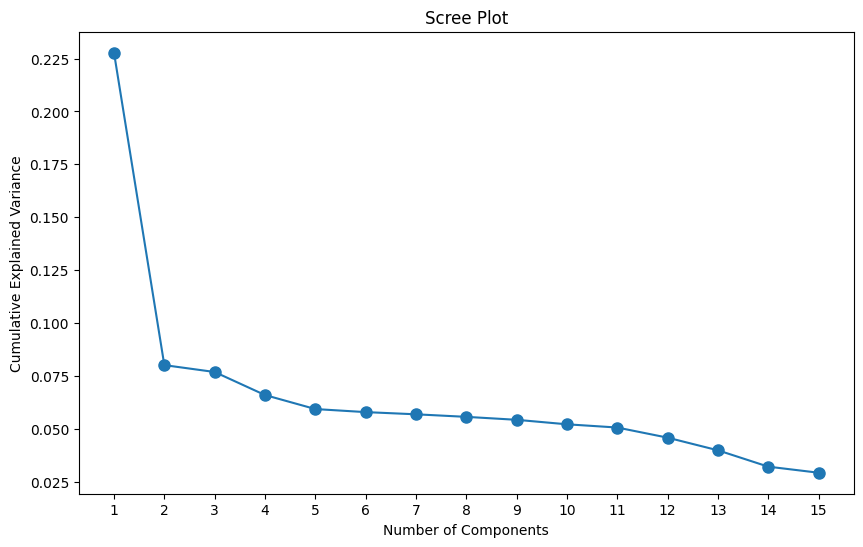

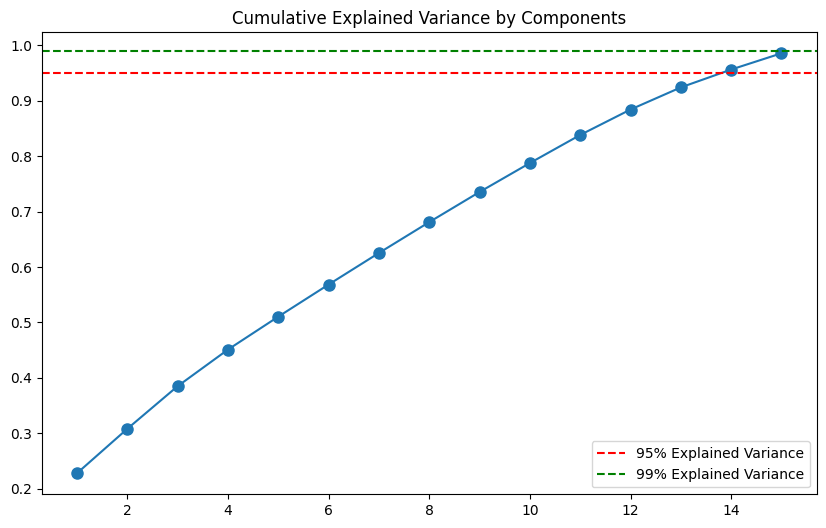

In [28]:
X_pca = standardized_pca(X, 15)

In this case, in order to explain 99% of the variance, we still need 15 features. This may be due to the fact that our features are not so linearly dependent on each other, shown in the correlation heatmap above.

In [29]:
# 70-30 train-test split
y_pca = y.copy()
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=123456)

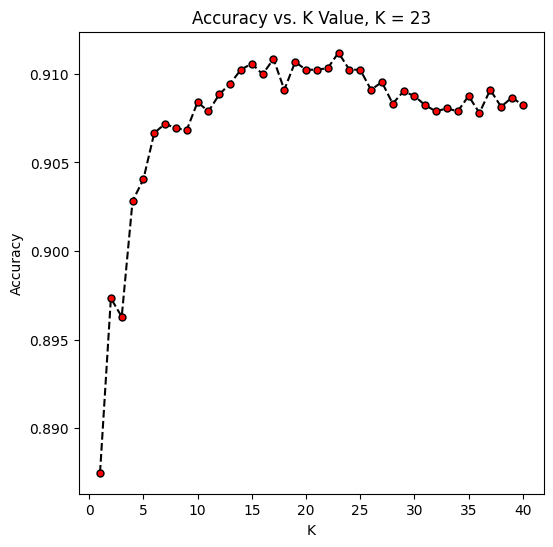

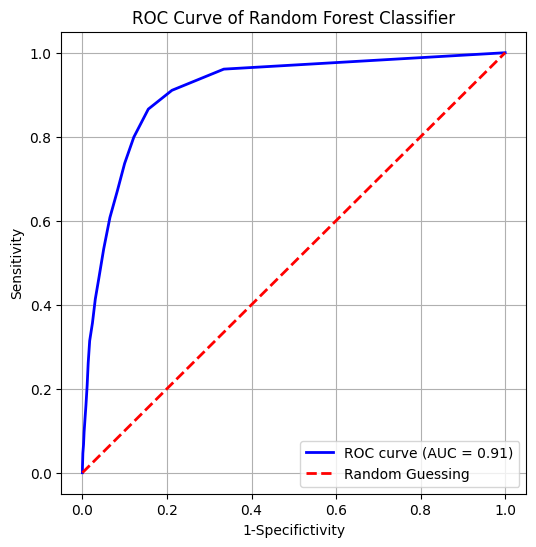

Maximum accuracy:  0.9111905176921736 at K = 23


In [30]:
knn_with_pca = KNN_train(X_train_pca, X_test_pca, y_train_pca, y_test_pca, 40)

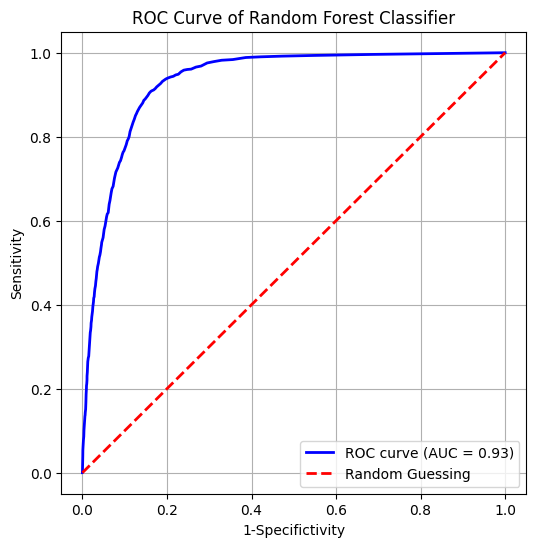

Accuracy:  0.9131078961129511


In [34]:
# TRAIN Random Forest model
rf_classifier_pca = RF_train(X_train_pca, X_test_pca, y_train_pca, y_test_pca, 200)

## Conclusion

With 2 fairly simple models, we achieve more than $91%$ of accuracy when predicting the successfulness of the campaign on people. I believe this is a fairly good accuracy regarding how many metrics we have.

A reality check, **duration** is a feature that is captured after the call and it is highly influence the outcome of **y**, which can be expressed as "if **duration** == 0 then **y**= 0." This makes sense, because if a recipient reject the call, i.e refuse to learn more about the campaign, they are very likely not interested in getting involved. Therefore, excluding this feature will yield a more realistic model. 

In [35]:
df[(df["y"] == 1) & (df["duration"] == 0)] # no record where y = 1 and duration = 0

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [2]:
jupyter nbconvert --debug project_2.ipynb --to html


SyntaxError: invalid syntax (1297278123.py, line 1)